In [1]:
from ngsolve import *
import sys
sys.path.append(r'C:\EMSolution\EMSolpy4\bin\Release') 
from EMPY_Field import *
sys.path.append('..\model')
from Cylinder_Yaxis_1Layer import Cylinder_Yaxis_1Layer

model=Cylinder_Yaxis_1Layer()
mesh=model.mesh
Draw(mesh)


enter iccg_solve
Dof= 35477    matrix size= 1766085.0
shift parameter= 1.0
minimum residual= 8.376388443283746e-17  at iteraions:  61


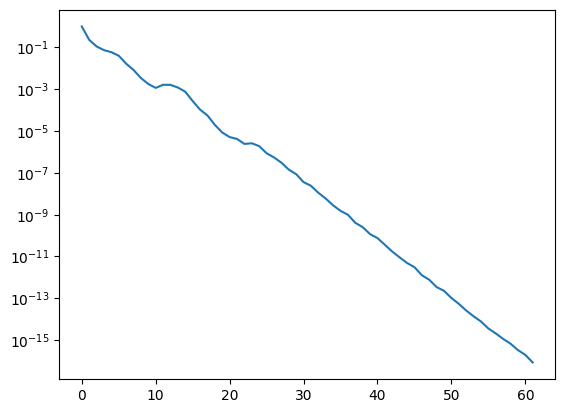

結果のノルム: 1.6047758220287566e-15
power=  776981.3970812623


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

(7.003350168627988e-08, 1.8034265356605985, 9.292118613948763e-16)


In [2]:

from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
import math
import numpy as np
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 

symmetric_plane=model.symmetric_plane
Mu=model.Mu
reduced_region=model.reduced_region
total_region=model.total_region
total_boundary=model.total_boundary
reduced_boundary=model.reduced_boundary

Dirichlet=True
feorder=3

coil=UNIF(0,1,0,2)
Av=Afield(coil)
Bv=Bfield(coil)

if Dirichlet==False:
    fesA=HCurl(mesh, order=feorder, dirichlet=symmetric_plane, nograds=True)
else:
    fesA=HCurl(mesh, order=feorder, dirichlet=symmetric_plane+"|"+reduced_boundary, nograds=True)
    
mu=4.e-7*math.pi
normal = specialcf.normal(mesh.dim)
A,N = fesA.TnT()
a= BilinearForm(fesA)
a +=1/Mu*curl(A)*curl(N)*dx
with TaskManager():
    a.Assemble()

gfA = GridFunction(fesA)

if Dirichlet==False:
    h=Bv/mu
    f = LinearForm(fesA)
    f += Cross(N.Trace(),h)*normal*ds(reduced_boundary)
    with TaskManager():
        f.Assemble()
    gfA=solver.iccg_solve(fesA, gfA, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=0.0, complex=False)

else:
    #Av=(0,0, -x)
    gfA.Set(Av, BND, mesh.Boundaries("reduced_boundary"))
    """
    r=-a.mat*gfA.vec
    gfA=solver.iccg_solve(fesA, gfA, a, r.Evaluate(), tol=1.e-16, max_iter=200, accel_factor=0, complex=False)

    """
    f = LinearForm(fesA)
    f +=-1/Mu*curl(gfA)*curl(N)*dx
    with TaskManager():
        f.Assemble()  
    gfA=solver.iccg_solve(fesA, gfA, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=0, complex=False)
    
Draw (gfA, mesh, order=3, min=-1.0, max=1.0, deformation=False)       
Bfield=curl(gfA)
Draw (Bfield, mesh, order=3, min=0.5, max=1.2, deformation=False)
mip = mesh(0,0,0)
print(Bfield(mip))


Dirichlet=False

A Field
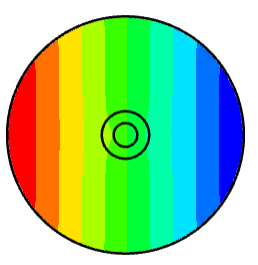


(7.188862689599656e-08, 1.833180549349472, 3.4625150198564895e-15) at (0,0,0)

B_Field
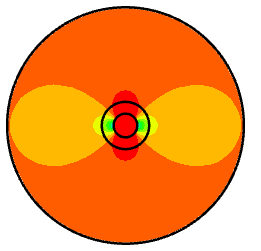

Dirichlet=True

A Field
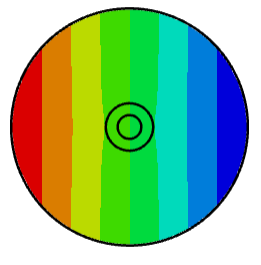

(7.003350168627988e-08, 1.8034265356605985, 9.292118613948763e-16)  at (0,0,0)

B_Field
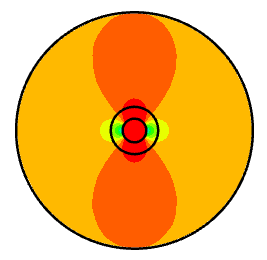
